# ESSENTIAL IMPORTS & SETTINGS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Don't want pandas to truncate the output of all our 122 cols. 
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# SOME FUNCTIONS

In [6]:
def IdentifyNulls(df):
    totalLen = df.shape[0]
    nulls = df.isnull().sum()
    nulls = nulls.reset_index()
    nulls.columns = ['Name', 'Nulls']
    nulls['Percentage'] = nulls['Nulls']*100 / totalLen  # Calc percentage of null values in each column
    nulls.sort_values('Percentage', ascending=False, inplace=True)
    print(nulls.head(200))

In [7]:
# in_df:            The input (original) data frame. 
# in_columnList:    List of Numerical variable names. 
def MakeHeatMap(in_df, in_columnList):
    corr_matrix = in_df[in_columnList].corr()
    # Now Plot the Heatmap. 
    cm_min = min(corr_matrix.min())*1.1
    cm_max = max(corr_matrix.max())*1.1
    plt.figure(figsize=(15,10))
    plt.subplot(1,1,1)
    sns.set_context("paper", font_scale=1.4)
    ax1 = sns.heatmap(data=corr_matrix, cmap='Blues', annot=True, fmt='.2f',  xticklabels=in_columnList, vmin=cm_min, vmax=cm_max)
    ax1.set(title="Correlation Matrix HeatMap", xlabel="Variables")
    plt.show()
        

In [8]:
def Top10Correlations(df):
    corr_mat = df.corr()
    corr = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
    corr = corr.abs().unstack().reset_index()
    corr.columns = ['V1', 'V2', 'Correlation']
    corr.dropna(subset=['Correlation'], inplace=True)
    output = corr.sort_values(by='Correlation', ascending=False).head(10)
    print(output)


In [88]:
def MakeBarPlot_CategoryVars_vs_Target(df):
    columns = df.columns
    
    for col in columns:
        if col == 'TARGET': continue
        
        uniqVals = df[col].unique().tolist()
        uniqVals = list(map(str, uniqVals)) # ensure they are all strings (eg., "0", "1" ...)
        uniqVals_num = len(uniqVals)
        longestValue = max(uniqVals, key = len)
        longestValueLen = len(longestValue)
        
        df_grp = df.groupby([col, 'TARGET']).agg(count_col=pd.NamedAgg(column=col, aggfunc="count") )
        df_grp = df_grp.reset_index()
        df_grp.rename(columns = {'count_col':'Count'}, inplace = True)

        xsize = 10; ysize = 5; xlabel_angle = 0
        if uniqVals_num > 10:
            xsize = 20; 
            if longestValueLen > 5: xlabel_angle = 90
        elif uniqVals_num > 5:
            xsize = 15; 
            if longestValueLen > 5: xlabel_angle = 90
        else:
            if longestValueLen > 10: xlabel_angle = 90
        
        plt.figure(figsize=(xsize,ysize))
        
        chart = sns.barplot(data=df_grp, x=col, y="Count", hue='TARGET')
        chart.set_xticklabels(chart.get_xticklabels(), rotation=xlabel_angle)
        plt.show()
        print("\n")

In [10]:
def GetSample(columnsList):
    df0 = ad_T_0[columnsList].sample(n=2000, replace=False)
    df1 = ad_T_1[columnsList].sample(n=2000, replace=False)
    df = pd.concat([df0, df1], axis=0)
    return df

# READ THE DATA FILES

In [11]:
ad= pd.read_csv("application_data.csv")
pa= pd.read_csv("previous_application.csv")

In [12]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [14]:
ad.shape

(307511, 122)

In [15]:
# Check null value percentage in all columns in application data
chk_null_allcol_ad=ad.isnull().sum()*100/len(ad)
chk_null_allcol_ad.sort_values(ascending=False).head()# check for head(55) till is more missing values

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
dtype: float64

# DATA CLEANING

## Handling Null Values

In [16]:
# check for the null value percetage in all columns in previous application
chk_null_allcol_pa=pa.isnull().sum()*100/len(pa)
chk_null_allcol_pa.sort_values(ascending=False).head()# check for head(12) till is more missing values

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
NAME_TYPE_SUITE             49.119754
dtype: float64

In [17]:
# Check for the columns which have null value more than 50 percent in application data
row_count_50per_ad=ad.shape[0]/2
chk_cols_nullgt50_ad = ad.columns[ad.isnull().sum() > row_count_50per_ad]
print("Total null  columns more then 50% null value in application data:",len(chk_cols_nullgt50_ad))

Total null  columns more then 50% null value in application data: 41


In [18]:
# Check for the columns which have null value more than 50 percent in previous application
row_count_50per_pa = pa.shape[0]/2
chk_cols_nullgt50_pa = pa.columns[pa.isnull().sum() > row_count_50per_pa]
print("Total null  columns more then 50% null value in previous application:",len(chk_cols_nullgt50_pa))

Total null  columns more then 50% null value in previous application: 4


In [19]:
# Dropping the columns which have more then 50% of data in application data
ad = ad.drop(chk_cols_nullgt50_ad, axis=1)

In [20]:
# Dropping the columns which have more then 50% of data in previous application
pa = pa.drop(chk_cols_nullgt50_pa,axis=1)

In [21]:
# Check the shape for both data
print("shape for application data:",ad.shape)
print("shape for application data:",pa.shape)

shape for application data: (307511, 81)
shape for application data: (1670214, 33)


### After eliminating all columns with >50% missing values, we will analyze remaining columns.  
### Eg., Occupation column has almost 31% missing values, but this will be an important variable for analysis. 

In [22]:
# We will check if the credit bureau check variables have any correlation with Target (Approved/Rejected).

creditChkCols = [
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

ad[creditChkCols].corrwith(ad['TARGET'])

AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
dtype: float64

In [23]:
# We see almost negligible correlation of these columns with TARGET column.  Hence, we will elminate these columns as well. 
ad = ad.drop(columns = creditChkCols)

In [24]:
# categorical columns in application_data dataset
category_clmns_ad = ['SK_ID_CURR','TARGET','OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE','CODE_GENDER',
                    'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                    'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','ORGANIZATION_TYPE',
                    'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                    'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'REG_REGION_NOT_LIVE_REGION',
                    'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START',
                    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Non-categorical columns in application_data dataset
non_category_clmns_ad = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                        'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                        'REGION_POPULATION_RELATIVE','DAYS_BIRTH','CNT_FAM_MEMBERS','CNT_CHILDREN','DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                        'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                        'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 
                        'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

# categorical columns in previous_application dataset
category_clmns_pa = ['SK_ID_PREV', 'SK_ID_CURR','NAME_CONTRACT_TYPE', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START',
                    'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE',
                    'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 
                    'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
                    'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

# Non-categorical columns in previous_application dataset
non_category_clmns_pa = ['AMT_APPLICATION','AMT_CREDIT','DAYS_DECISION', 'SELLERPLACE_AREA']

In [25]:
# Identify columns with  null values and see what all can be dropped. 
IdentifyNulls(ad)

                            Name   Nulls  Percentage
43                 FLOORSMAX_AVG  153020   49.760822
45                FLOORSMAX_MODE  153020   49.760822
47                FLOORSMAX_MEDI  153020   49.760822
42   YEARS_BEGINEXPLUATATION_AVG  150007   48.781019
44  YEARS_BEGINEXPLUATATION_MODE  150007   48.781019
46  YEARS_BEGINEXPLUATATION_MEDI  150007   48.781019
48                TOTALAREA_MODE  148431   48.268517
49           EMERGENCYSTATE_MODE  145755   47.398304
27               OCCUPATION_TYPE   96391   31.345545
41                  EXT_SOURCE_3   60965   19.825307
11               NAME_TYPE_SUITE    1292    0.420148
50      OBS_30_CNT_SOCIAL_CIRCLE    1021    0.332021
51      DEF_30_CNT_SOCIAL_CIRCLE    1021    0.332021
52      OBS_60_CNT_SOCIAL_CIRCLE    1021    0.332021
53      DEF_60_CNT_SOCIAL_CIRCLE    1021    0.332021
40                  EXT_SOURCE_2     660    0.214626
10               AMT_GOODS_PRICE     278    0.090403
9                    AMT_ANNUITY      12    0.

In [26]:
# We see that there are still a few REALTY related columns (with close to 50% missing values). 
# Most of the other REALTY columns had already been dropped. We will drop these columns as well.
Leftover_Realty_Columns = [ 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
                        'YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE',
                        'YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', ]

ad = ad.drop(columns = Leftover_Realty_Columns)

In [27]:
# Columns with less than 1% null values: (Drop rows with null values in these columns as they will not impact EDA)
cols2Check = ['NAME_TYPE_SUITE', 
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

rowsToDrop = list(np.where(ad[cols2Check].isnull())[0])
ad = ad.drop(ad.index[rowsToDrop])

In [28]:
# Finding the list of actual null columns from the dataframes ad ,that contains all columns which has less than 50% Null values

clmn_ad_null_cate = [i for i in ad.columns[ad.isna().any()].tolist() if i in category_clmns_ad]
print("\nList of all categorical columns that has actual missing values in among less than 50% null value columns in application_data: ", clmn_ad_null_cate)

clmn_ad_null_noncat=[i for i in ad.columns[ad.isna().any()].tolist() if i in non_category_clmns_ad]
print("\n\nList of all non categorical columns that has actual missing values in among less than 50% null value columns in application_data: ", clmn_ad_null_noncat)


List of all categorical columns that has actual missing values in among less than 50% null value columns in application_data:  ['OCCUPATION_TYPE']


List of all non categorical columns that has actual missing values in among less than 50% null value columns in application_data:  ['EXT_SOURCE_3']


In [29]:
# Finding the list of actual null columns from the dataframes pa, 
# that contains all columns which has less than 50% Null values

clmn_pa_null_cate = [i for i in pa.columns[pa.isna().any()].tolist() if i in category_clmns_pa]
print("List of all categorical columns that has actual missing values (less than 50% null values) in previous_data: ", clmn_pa_null_cate)

clmn_pa_null_noncat = [i for i in pa.columns[pa.isna().any()].tolist() if i in non_category_clmns_pa]
print("\nList of all non categorical columns that has actual missing values (less than 50% null values)  in previous_data: ", clmn_pa_null_noncat)

List of all categorical columns that has actual missing values (less than 50% null values) in previous_data:  ['PRODUCT_COMBINATION']

List of all non categorical columns that has actual missing values (less than 50% null values)  in previous_data:  ['AMT_CREDIT']


In [30]:
# In general, category variables are imputed with MODE values. 
# However, for variables like OCCUPATION or PRODUCT_COMBINATION, it would be better to represent missing values with XNA.

# Replacing null categorical variable with XNA in ad(application_data dataframe)
for i in clmn_ad_null_cate:
    ad[i].fillna('XNA', inplace=True)

# Replacing null categorical variable with XNA in pa(previous application dataframe)
for i in clmn_pa_null_cate:
    pa[i].fillna('XNA',inplace=True)

## Finding Outliers

In [31]:
# Finding Outliers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_ad = ad.select_dtypes(include=numerics)
num_pa = pa.select_dtypes(include=numerics)

# We are not considering the numerical columns which are actually categorical, in detecting outliers.

categorical_num_columns_ad = ['SK_ID_CURR','TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                           'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                           'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                           'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
                           'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
                           'FLAG_DOCUMENT_21'] 

categorical_num_columns_pa = ['SK_ID_PREV','SK_ID_CURR','NFLAG_LAST_APPL_IN_DAY']

In [32]:
# Removing the numerical_categorical columns 
num_ad = num_ad.drop(columns=categorical_num_columns_ad)
num_pa = num_pa.drop(columns=categorical_num_columns_pa)
print(num_ad.columns)
print(num_pa.columns)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')
Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINAT

In [33]:
# Identify columns with outliers (among the numeric columns). 

clmn_ad_non_cate_outlier = num_ad.columns[((num_ad.std()/num_ad.mean())*100).abs()>85].tolist()
print("Columns that has outliers in application_data.csv, \nwhich has a standard deviation of more than 85% from its mean:\n\n ", clmn_ad_non_cate_outlier)

clmn_pa_non_cate_outlier = num_pa.columns[((num_pa.std()/num_pa.mean())*100).abs()>85].tolist()
print("\nColumns that has outliers in previous_application.csv, \nwhich has a standard deviation of more than 85% from its mean:\n\n", clmn_pa_non_cate_outlier)

Columns that has outliers in application_data.csv, 
which has a standard deviation of more than 85% from its mean:

  ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

Columns that has outliers in previous_application.csv, 
which has a standard deviation of more than 85% from its mean:

 ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [34]:
# Identify outliers in above columns (we will make reasonable assumptions by looking at the data 
# rather than using IQR*1.5 as threshold of outliers).

ad[clmn_ad_non_cate_outlier].describe(percentiles=[0.99])


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,304531.000000,3.045310e+05,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000,304531.000000
mean,0.417140,1.686634e+05,63831.232423,0.015154,0.050675,0.040518,0.078212,0.230630,0.179709,1.422052,0.143421,1.405131,0.100069,-965.330085
std,0.722308,2.378910e+05,141291.148422,0.122167,0.219333,0.197171,0.268505,0.421237,0.383946,2.401424,0.446721,2.380308,0.362388,826.943447
min,0.000000,2.565000e+04,-17912.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
50%,0.000000,1.476000e+05,-1215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-761.000000
99%,3.000000,4.545000e+05,365243.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,2.000000,0.000000
max,19.000000,1.170000e+08,365243.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000


### Observations: Outliers in AD categorical variables:

We see following fields of interest that potentially have outliers: 

| Field | Analysis | 
|:------|:---------|
| AMT_INCOME_TOTAL | However, some individuals are high net worth and can indeed have such income. So no outliers here. |
| DAYS_EMPLOYED    | There are values with 365243 (1000+ years) which are clearly wrong. |

Remaining columns seem to have plausible values. And we will not focus on them.  Our field of interest here is DAYS_EMPLOYED. 


In [35]:
# Analysing DAYS_EMPLOYED in Application Data
df = ad.loc[ad.DAYS_EMPLOYED > 0, ['DAYS_EMPLOYED']]
print(df.shape) # (54852, 1)

df = ad.loc[ad.DAYS_EMPLOYED == ad.DAYS_EMPLOYED.max(), ['DAYS_EMPLOYED']]
print(df.shape) # (54852, 1)

# The code above shows that all rows with DAYS_EMPLOYED > 0 are equal to 365243 (1000 years). 
# Since all legit values are -ve, this high +ve value is an indicator we don't have any data here. 

# However, this can skew the results significantly when taking 'mean' later on. 
# Hence, we will impute these values (+365243) usng the median so as to have minimum impact on our EDA. 
#  - We don't want to use "mean" here since it has already been highly skewed (~ 20+ years) by 50K+ values of 365243. 

median = ad.DAYS_EMPLOYED.median()
ad.DAYS_EMPLOYED.replace({365243: median}, inplace=True)
print("Imputing 365243 in DAYS_EMPLOYED with median value:", median)

del df # Reclaim some RAM memory. 
ad.DAYS_EMPLOYED.describe()

(54852, 1)
(54852, 1)
Imputing 365243 in DAYS_EMPLOYED with median value: -1215.0


count    304531.000000
mean      -2175.033658
std        2165.529078
min      -17912.000000
25%       -2762.000000
50%       -1215.000000
75%        -934.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [36]:
# Now we do the same for the categorical variables in PA
pa[clmn_pa_non_cate_outlier].describe(percentiles=[0.99])

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,-8.806797e+02,3.139511e+02,1.605408e+01,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.790997e+02,7.127443e+03,1.456729e+01,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,-5.810000e+02,3.000000e+00,1.200000e+01,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
99%,6.968579e+04,1.350000e+06,1.515378e+06,1.395000e+06,-1.400000e+01,3.570000e+03,6.000000e+01,365243.000000,365243.000000,365243.000000,365243.000000,1.000000
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Observations of outliers in PA categorical variables: 
- In PA data, only the DAYS_#_DUE or DAYS_TERMINATION have outlier (initializer) values of 365243. 
- At this point, these columns do not seem likely candidates to impact default/no-default.  
- However, if at later stage, these columns show correlation to TARGET (0 / 1), then we will impute them with median values at that time. 

In [37]:
# Dealing with the missing values in non categoricalvariables that has outliers:

# Preparing a list containing null, non-categoricall variables containing outliers in application_data
clmn_ad_null_non_cate_outlier = [i for i in clmn_ad_null_noncat if i in clmn_ad_non_cate_outlier]
print(clmn_ad_non_cate_outlier)

# Preparing a list containing null, non-categoricall variables containing outliers in previous_application
clmn_pa_null_non_cate_outlier = [i for i in clmn_pa_null_noncat if i in clmn_pa_non_cate_outlier]
print(clmn_pa_null_non_cate_outlier)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
['AMT_CREDIT']


In [38]:
# Replacing null,non-categorical variable (having outliers) with median in application_data dataframe
for i in clmn_ad_null_non_cate_outlier:
    ad[i].fillna(ad[i].median(),inplace=True)


# Replacing null,non-categorical variable (having outliers) with median in previous_application dataframe
for i in clmn_pa_null_non_cate_outlier:
    pa[i].fillna(pa[i].median(),inplace=True)
    
    

In [39]:
#Dealing with missing values in non-categorical variables that does not have outliers

# Preparing a list containing null, non-categorical variables containing no outliers in application_data
clmn_ad_null_non_cate_no_outlier = [i for i in clmn_ad_null_noncat if i not in clmn_ad_null_non_cate_outlier]
print(clmn_ad_null_non_cate_no_outlier)

# Preparing a list containing null, non-categorical variables containing no outliers in previous_application
clmn_pa_null_non_cate_no_outlier = [i for i in clmn_pa_null_noncat if i not in clmn_pa_null_non_cate_outlier]
print(clmn_pa_null_non_cate_no_outlier)

['EXT_SOURCE_3']
[]


In [40]:
# We see there is still EXT_SOURCE_3 identified as a numerical column with null values. Let's impute null values with mean. 
ad.EXT_SOURCE_3.replace({np.NaN: ad.EXT_SOURCE_3.mean()}, inplace=True)
ad.EXT_SOURCE_3.isnull().sum() # Should give 0

0

In [41]:
# Replacing null,non-categorical variable (having no outliers) with mean in application_data dataframe
for i in clmn_ad_null_non_cate_no_outlier:
    ad[i].fillna(ad[i].mean(),inplace=True)
    
# Replacing null,non-categorical variable (having no outliers) with mean in previous_application dataframe
for i in clmn_pa_null_non_cate_no_outlier:
    pa[i].fillna(pa[i].mean(),inplace=True)

In [42]:
# Check if is there any null values left out

print('Is there any null values in df_application_data: ', ad.isnull().values.any())
print('Is there any null values in df_previous_application: ', pa.isnull().values.any())
       

Is there any null values in df_application_data:  False
Is there any null values in df_previous_application:  True


In [43]:
print(clmn_ad_null_non_cate_outlier)
print(clmn_pa_null_non_cate_outlier)

[]
['AMT_CREDIT']


In [44]:
# Check if indeed any nulls in AMT_CREDIT
pa.AMT_CREDIT.isnull().sum()
# Answer: 0.  So no nulls in AMT_CREDIT either. 

0

## Convert Categorical Variables to Ordinal Data


The NAME_EDUCATION_TYPE column can be converted to ordinal data to show the level of education that a person has. 


In [45]:
edu_dict =  {'Academic degree':             5,
             'Higher education':            4,
            'Incomplete higher':            3, 
            'Secondary / secondary special':2,
            'Lower secondary':              1}

ad['EDUCATION_SCORE'] = ad.NAME_EDUCATION_TYPE.map(edu_dict)

ad.EDUCATION_SCORE.value_counts()

2    216582
4     73821
3     10175
1      3790
5       163
Name: EDUCATION_SCORE, dtype: int64

# DATA ANALYSIS

## Handling Data Imbalance

### Analysis to be carried out:
By Analysing the given datasets we could sense that the columns which gives direct information on the loan approval/rejection are 'Target' and 'NAME_CONTRACT_STATUS' repectively on 'application_data.csv' and 'Previous_application.csv'. Further, I'm gonna perform univariate and bi-variate analysis to get more insight on these columns and the co-relation with the other columns, so that, we can understand how loan approval/rejection is estimated, and which are the cariables influences this.

### Finding if there is Imbalance in data
- As per our problem statement and with the given data sets we need to check whether a person will likely pay the loan amount or will become a defaulter. To find that we need to feed the data to our model with the help of the data sets provided to us.
- If the data is imbalanced, it means that one of the classifications (defaulters vs non-defaulters) will have excess amount of data compared to the other classes (eg. 10 times or more). 
- Since we are concerned with the 'TARGET' variable to detect whether to approve/reject loan, we are going to focus on finding if there is any imbalance on this variable.

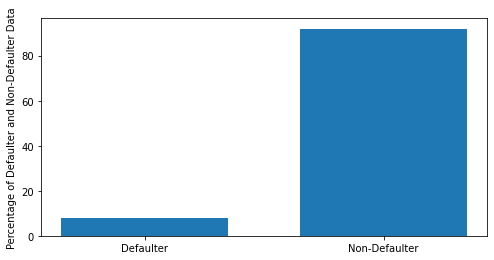

Ratios of imbalance in percentage with respect to non-defaulter and defaulter datas are: 91.900004 and 8.099996
Ratios of imbalance in real-numbers with respect to non-defaulter and defaulter datas is 11.345685 : 1 (approx)


In [46]:
count_1=0
count_0=0

for i in ad.TARGET.values:
    if i==1:
        count_1=count_1+1
    else:
        count_0=count_0+1

count_1_per= (count_1/(count_1+count_0))*100
count_0_per= (count_0/(count_1+count_0))*100

x=['Defaulter','Non-Defaulter']
y=[count_1_per,count_0_per]

plt.figure(figsize=[8,4])
plt.bar(x,y,width=0.7)
plt.ylabel('Percentage of Defaulter and Non-Defaulter Data')
plt.show()

print('Ratios of imbalance in percentage with respect to non-defaulter and defaulter datas are: %f and %f'%(count_0_per,count_1_per))
print('Ratios of imbalance in real-numbers with respect to non-defaulter and defaulter datas is %f : 1 (approx)'%(count_0/count_1))

From the above graph we can very clearly see that there is an imbalance between the defaulters data and the non-defaulters.
As mentioned earlier, imbalance of data will tend to create a biased model. 

- One of the best technique to avoid the curse of imbalanced data is by undersampling the larger classified dataset and by oversampling the less classified dataset. So that, the final dataset will have a balanced/equal number of data among all the labels.
- When possible, we could explore the data based only on percentages rather than absolute values. This too will deal with imbalanced data sets. 

## Segmenting Data into Defaulters vs Non-Defaulters. 

Dividing the data into two sets, i.e. Target=1 and Target=0 for application_data

In [47]:
ad_T_0 = ad[ad.TARGET == 0]
ad_T_1 = ad[ad.TARGET == 1]


### Dividing the data into two sets, i.e. Target=1 and Target=0 for previous_application dataset

Creating a target variable for the previous_application dataset. 
In order to create a target varible in prev_app_data we are going to consider the column: NAME_CONTRACT_STATUS
We are going classify the status 'Refused' as 1 and 'Approved' as 0. The reason for this assumption is that if the previous company rejects the loan for a person then the only reason for doing so is that the company would have sensed that the person might be having payment difficulties. On the other hand, if the previous company approved the loan for a person then the only reason would be that the company would have sensed that the person would not have any payment difficulties.
We are going to remove all other rows where the status is 'cancelled' or 'unused offer'

In [48]:
prev_target=[]

for i in pa['NAME_CONTRACT_STATUS'].tolist():
    if i=='Approved':
        prev_target.append(0)
    elif i=='Refused':
        prev_target.append(1)
    else:
        prev_target.append(None)
        
# Creting a 'Target' variable with  Approved = 0, Refused = 1, all other as Null
pa['TARGET']=prev_target

pa=pa.loc[(pa['TARGET']==1) | (pa['TARGET']==0)]
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [49]:
# Dividing the previous application data into two set
pa_T_0=pa[pa['TARGET']==0]
pa_T_1=pa[pa['TARGET']==1]

## Univariate Analysis

### Univariate Analysis on selected ordered-categorical variables that are common in both datasets

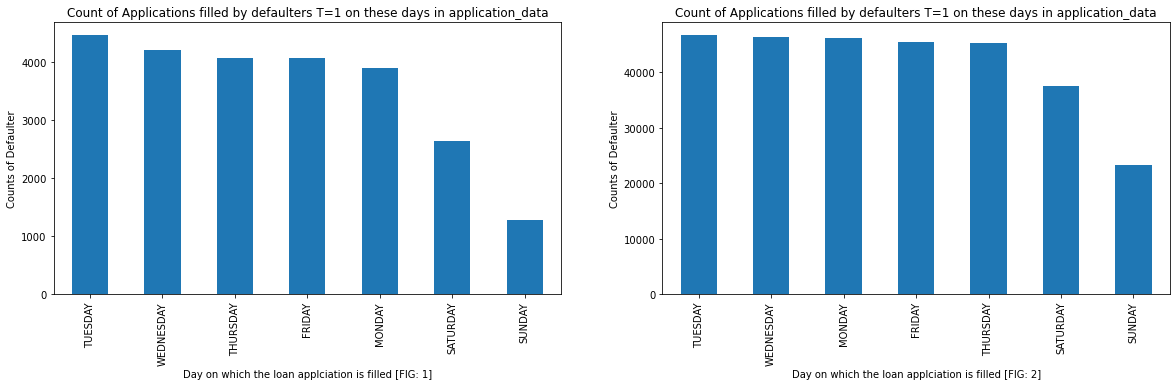

In [50]:
# For TARGET = 1
# Univariate analysis on selected ordered-categorical variable ('WEEKDAY_APPR_PROCESS_START') in both datasets for Target = 1
# Plotting the count and rank varaibles for WEEKDAY_APPR_PROCESS_START in both datasets for Target = 1

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_1['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by defaulters T=1 on these days in application_data')
plt.xlabel('Day on which the loan applciation is filled [FIG: 1]')
plt.ylabel('Counts of Defaulter')

plt.subplot(1,2,2)
pa_T_1['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by defaulters T=1 on these days in application_data')
plt.xlabel('Day on which the loan applciation is filled [FIG: 2]')
plt.ylabel('Counts of Defaulter')
plt.show()


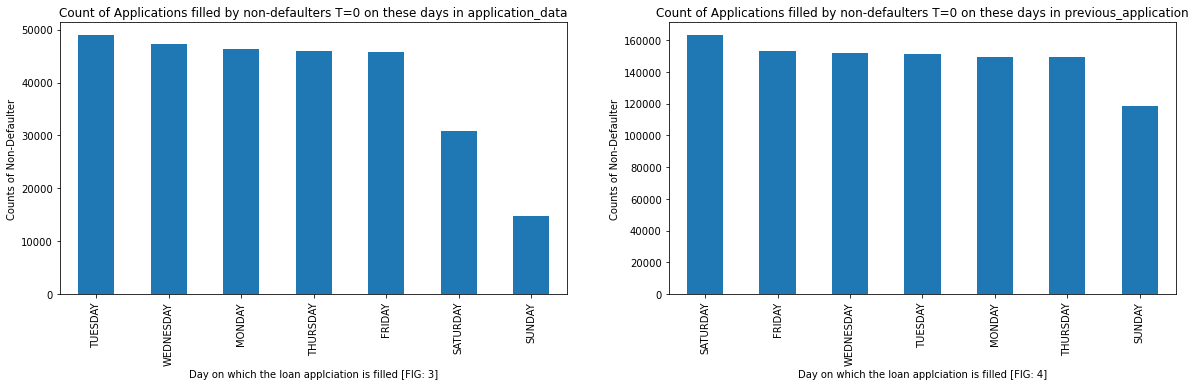

In [51]:
# For TARGET = 0
# Univariate analysis on selected ordered-categorical variable ('WEEKDAY_APPR_PROCESS_START') in both datasets for Target = 0
# Plotting the count and rank varaibles for WEEKDAY_APPR_PROCESS_START in both datasets for Target = 0

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_0['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by non-defaulters T=0 on these days in application_data')
plt.xlabel('Day on which the loan applciation is filled [FIG: 3]')
plt.ylabel('Counts of Non-Defaulter')

plt.subplot(1,2,2)
pa_T_0['WEEKDAY_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by non-defaulters T=0 on these days in previous_application')
plt.xlabel('Day on which the loan applciation is filled [FIG: 4]')
plt.ylabel('Counts of Non-Defaulter')
plt.show()

Analysis from above univariate analysis on WEEKDAY_APPR_PROCESS_START on both target variable 0 and 1 for both the data set :

FIG:1&2, shows that the maximum of defaulters who filled the application is on Tuesdays and the less number of applications filled is on Sunday.

FIG:3, shows the same pattern as above among non-defaulters too which is a total contradiction.

FIG:4, shows the similar pattern too where very less applications are filled on Sundays among non-defaulters.

### Conclusion: We cannot decide much using the days of the week on which the applications are filled in identifying the defaulters, because both in the case of defaulters and non-defaulters the pattern followed is very similar. 

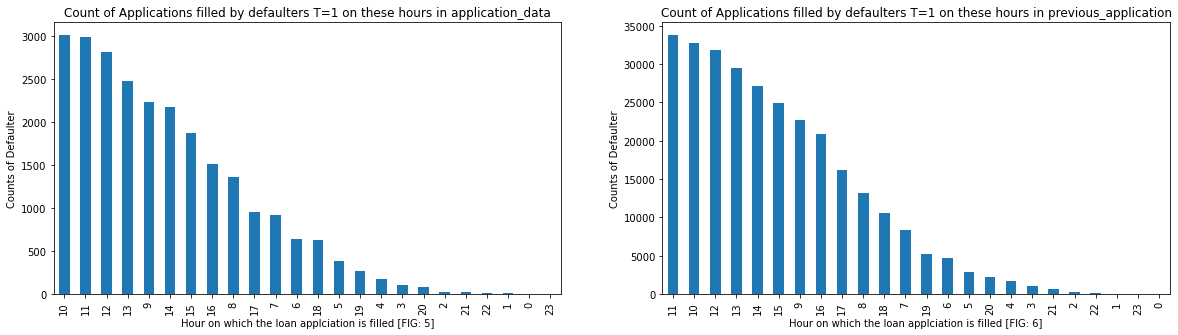

In [52]:
##Univariate analysis on selected ordered-categorical variable ('HOUR_APPR_PROCESS_START') in both datasets for Target = 1
# Plotting the count and rank varaibles for HOUR_APPR_PROCESS_START in both datasets for Target = 1

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_1['HOUR_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by defaulters T=1 on these hours in application_data')
plt.xlabel('Hour on which the loan applciation is filled [FIG: 5]')
plt.ylabel('Counts of Defaulter')

plt.subplot(1,2,2)
pa_T_1['HOUR_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by defaulters T=1 on these hours in previous_application')
plt.xlabel('Hour on which the loan applciation is filled [FIG: 6]')
plt.ylabel('Counts of Defaulter')
plt.show()


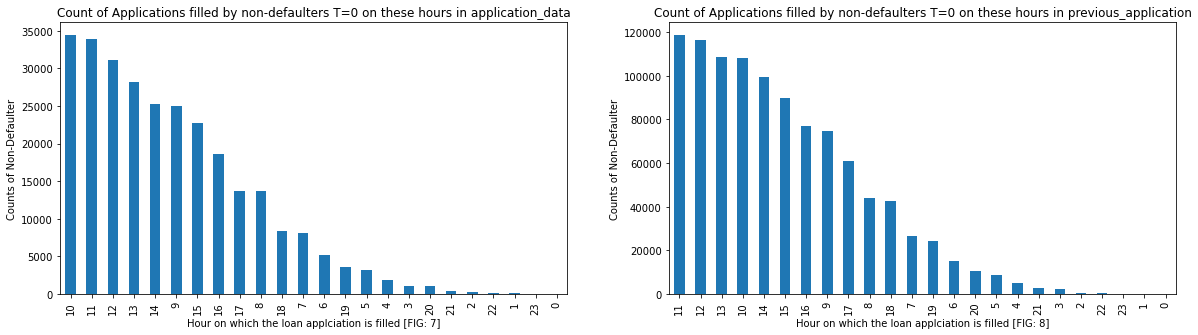

In [53]:
# Plotting the count and rank varaibles for HOUR_APPR_PROCESS_START in both datasets for Target = 0

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_0['HOUR_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by non-defaulters T=0 on these hours in application_data')
plt.xlabel('Hour on which the loan applciation is filled [FIG: 7]')
plt.ylabel('Counts of Non-Defaulter')

plt.subplot(1,2,2)
pa_T_0['HOUR_APPR_PROCESS_START'].value_counts().plot(kind='bar')
plt.title('Count of Applications filled by non-defaulters T=0 on these hours in previous_application')
plt.xlabel('Hour on which the loan applciation is filled [FIG: 8]')
plt.ylabel('Counts of Non-Defaulter')
plt.show()

In [54]:
#Analysis from above:

#FIG:5&6, shows that the maximum of defaulters who filled the application is on 10th and 11th hour.

#FIG:7&8, shows the same pattern as above among non-defaulters too which is a total contradiction.

#Conclusion: We cannot decide much using the hours on which the applications are filled in identifying the defaulters, because both in the case of defaulters and non-defaulters the pattern followed is very similar.

In [55]:
###Univariate Analysis on selected ordered-categorical variables that are present in application_data datasets


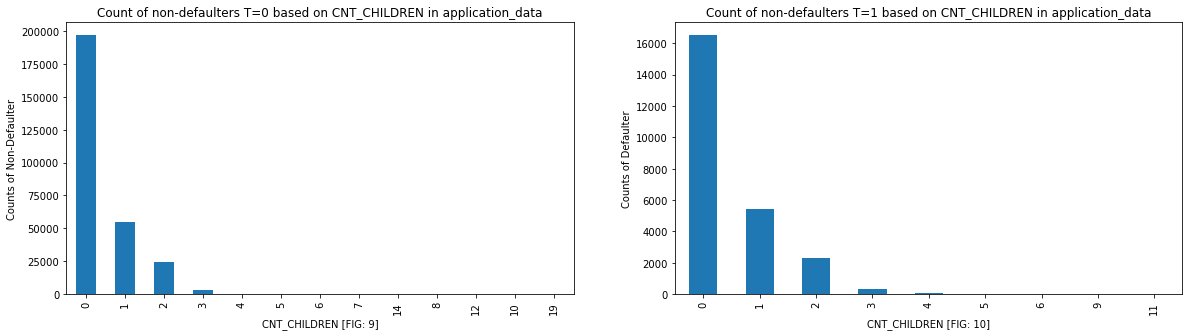

In [56]:
# Plotting the count and rank varaibles for CNT_CHILDREN in application_data datasets for Target = 0 and 1

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_0['CNT_CHILDREN'].value_counts().plot(kind='bar')
plt.title('Count of non-defaulters T=0 based on CNT_CHILDREN in application_data')
plt.xlabel('CNT_CHILDREN [FIG: 9]')
plt.ylabel('Counts of Non-Defaulter')

plt.subplot(1,2,2)
ad_T_1['CNT_CHILDREN'].value_counts().plot(kind='bar')
plt.title('Count of non-defaulters T=1 based on CNT_CHILDREN in application_data')
plt.xlabel('CNT_CHILDREN [FIG: 10]')
plt.ylabel('Counts of Defaulter')
plt.show()

In [57]:
#Analysis from above:
# FIG:9, shows the pattern where maximum number of non-defaulters are having 0 children while applying for the loan
# FIG:10, shows that the maximum of the defaulters have 0 children while applying for the loan
#Conclusion: We cannot decide much using CNT_Children in identifying the defaulters, because both in the case of defaulters and non-defaulters the pattern followed is the same.

In [58]:
#Univariate analysis on selected ordered-categorical variable ('NAME_EDUCATION_TYPE') in application_data datasets for Target = 0 and 1


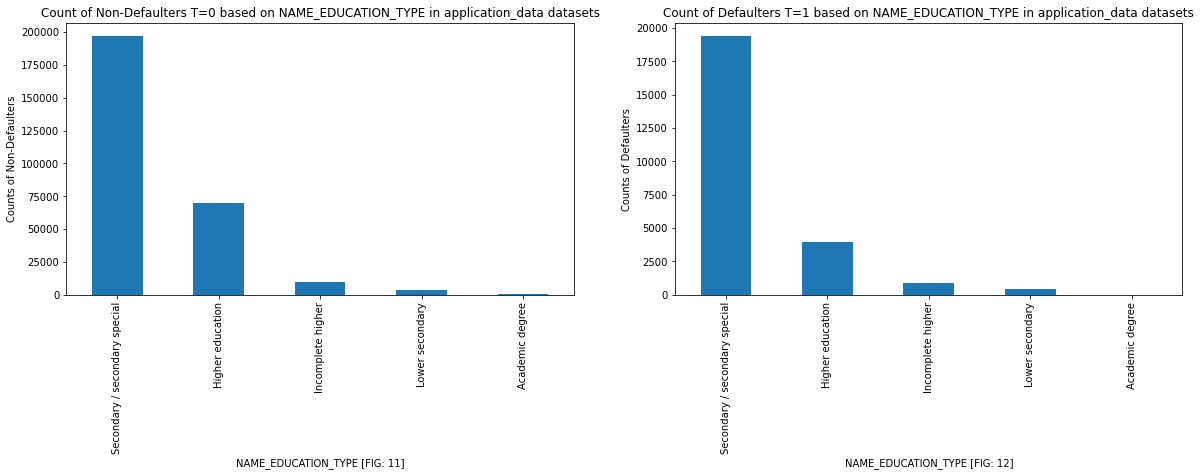

In [59]:
# Plotting the count and Level of highest education the client achieved ('NAME_EDUCATION_TYPE') for in application_data datasets for Target =  0 and 1
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_0['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.title("Count of Non-Defaulters T=0 based on NAME_EDUCATION_TYPE in application_data datasets")
plt.xlabel("NAME_EDUCATION_TYPE [FIG: 11]")
plt.ylabel('Counts of Non-Defaulters')

plt.subplot(1,2,2)
ad_T_1['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.title("Count of Defaulters T=1 based on NAME_EDUCATION_TYPE in application_data datasets")
plt.xlabel("NAME_EDUCATION_TYPE [FIG: 12]")
plt.ylabel('Counts of Defaulters')
plt.show()

### Analysis from above:

- FIG:11, shows the pattern where maximum number of non-defaulters are having secondary level of education while applying for the loan
- FIG:12, shows the pattern where maximum of the defaulters have secondary level of education while applying for the loan

### Conclusion: We cannot decide much using NAME_EDUCATION_TYPE in identifying the defaulters, because both in the case of defaulters and non-defaulters the pattern followed is the same.

In [60]:
###Univariate Analysis on selected ordered-categorical variables that are present in previous_application datasets
###Univariate analysis on selected ordered-categorical variable ('NAME_CLIENT_TYPE') in previous application datasets for Target = 0 and 1

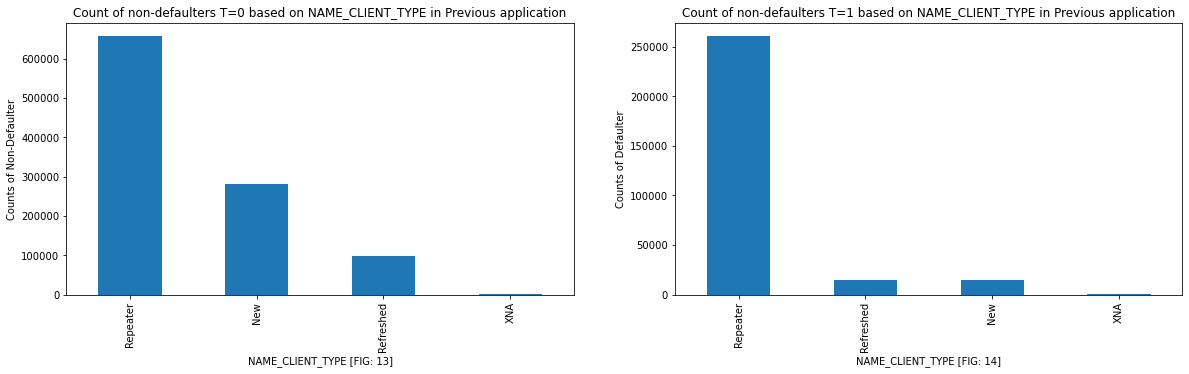

In [61]:
#Plotting the count and client type variable ('NAME_CLIENT_TYPE') for in previous application datasets for Target = 0 and 1

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
pa_T_0['NAME_CLIENT_TYPE'].value_counts().plot(kind='bar')
plt.title('Count of non-defaulters T=0 based on NAME_CLIENT_TYPE in Previous application')
plt.xlabel('NAME_CLIENT_TYPE [FIG: 13]')
plt.ylabel('Counts of Non-Defaulter')

plt.subplot(1,2,2)
pa_T_1['NAME_CLIENT_TYPE'].value_counts().plot(kind='bar')
plt.title('Count of non-defaulters T=1 based on NAME_CLIENT_TYPE in Previous application')
plt.xlabel('NAME_CLIENT_TYPE [FIG: 14]')
plt.ylabel('Counts of Defaulter')
plt.show()

In [62]:
#Analysis on above:
#FIG:13, shows the pattern where maximum number of non-defaulters are also repeated customers while applying for the loan

#FIG:14, shows the same pattern as above where maximum number of defaulters are also repeated customers while applying for the loan

#Conclusion: We cannot decide much using NAME_Client_TYPE in identifying the defaulters, because both in the case of defaulters and non-defaulters the pattern followed is the same.

In [63]:
###Univariate Analysis on selected unordered-categorical variables that are present in both datasets
#Univariate analysis on selected unordered-categorical variable ('NAME_CONTRACT_TYPE') in both datasets for Target = 1

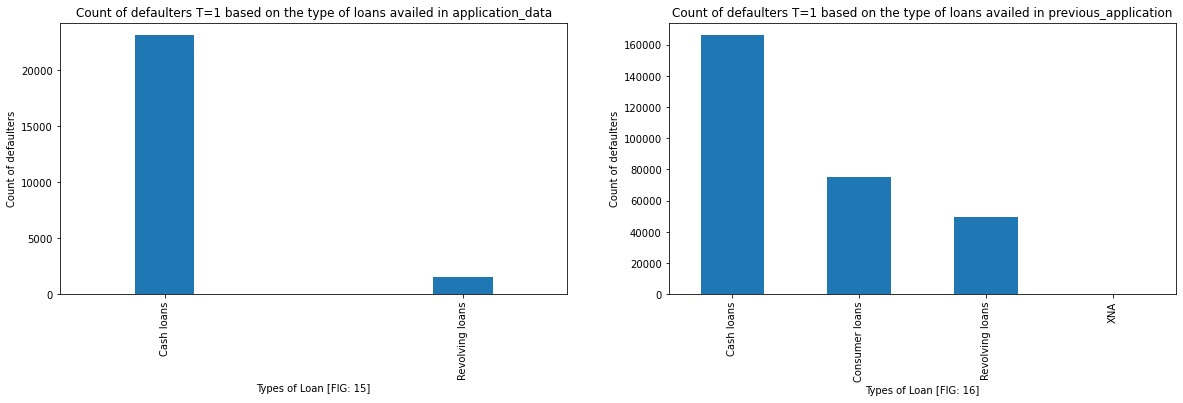

In [64]:
# Plotting the count and rank varaibles for NAME_CONTRACT_TYPE in both datasets for Target = 1

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_1['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar',width=0.2)
plt.title('Count of defaulters T=1 based on the type of loans availed in application_data')
plt.xlabel('Types of Loan [FIG: 15]')
plt.ylabel('Count of defaulters')

plt.subplot(122)
pa_T_1['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')
plt.title('Count of defaulters T=1 based on the type of loans availed in previous_application')
plt.xlabel('Types of Loan [FIG: 16]')
plt.ylabel('Count of defaulters')

plt.show()

In [65]:
##Univariate analysis on selected unordered-categorical variable ('NAME_CONTRACT_TYPE') in both datasets for Target = 0



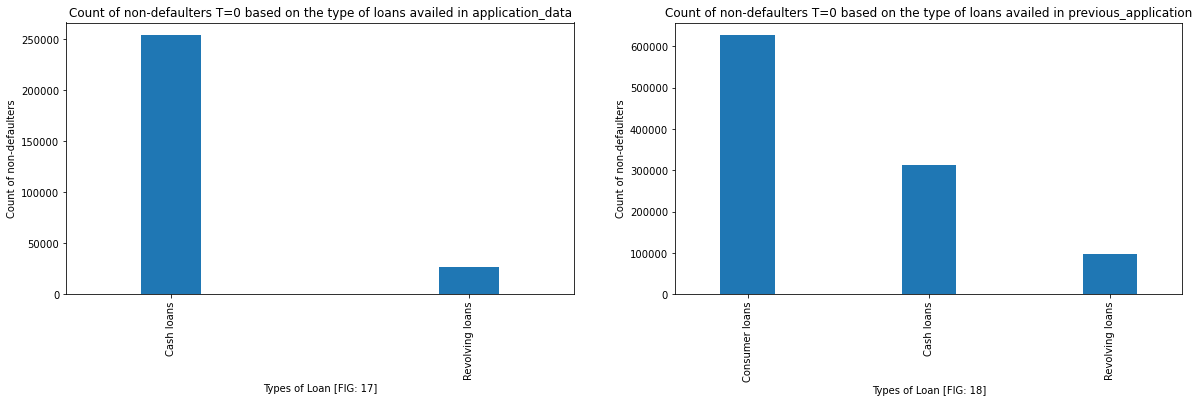

In [66]:
#Plotting the count and rank varaibles for WEEKDAY_APPR_PROCESS_START in both datasets for Target = 0
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ad_T_0['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar',width=0.2)
plt.title('Count of non-defaulters T=0 based on the type of loans availed in application_data')
plt.xlabel('Types of Loan [FIG: 17]')
plt.ylabel('Count of non-defaulters')

plt.subplot(1,2,2)
pa_T_0['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar',width=0.3)
plt.title('Count of non-defaulters T=0 based on the type of loans availed in previous_application')
plt.xlabel('Types of Loan [FIG: 18]')
plt.ylabel('Count of non-defaulters')

plt.show()

In [67]:
#Analysis from above:

#FIG:15&16, shows that the maximum of defaulters availed cash loans

#FIG:17&18, shows the same pattern as above where maximum number of non-defaulters availed cash loan too.

#Conclusion: We cannot decide much using type of loan availed in identifying the defaulters, because both in the case of defaulters and non-defaulters the pattern followed is the same.

## BiVariate Analysis: Non-Categorical Variables

In [68]:
# We also list the numerical variables of interest. We have divided the features into "related" features. 

num_personal = ['CNT_FAM_MEMBERS','CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE']
num_career_and_income = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'EDUCATION_SCORE' ]
num_region_extSources = ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_3' ,
'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' ]
num_application_processing = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH', ]

# Combine all the above columns
all_noncategory_cols = num_personal + num_career_and_income + num_region_extSources + num_application_processing


### We take a look at the correlation between the numerical variables (of Application Data) using HEAT MAP. 

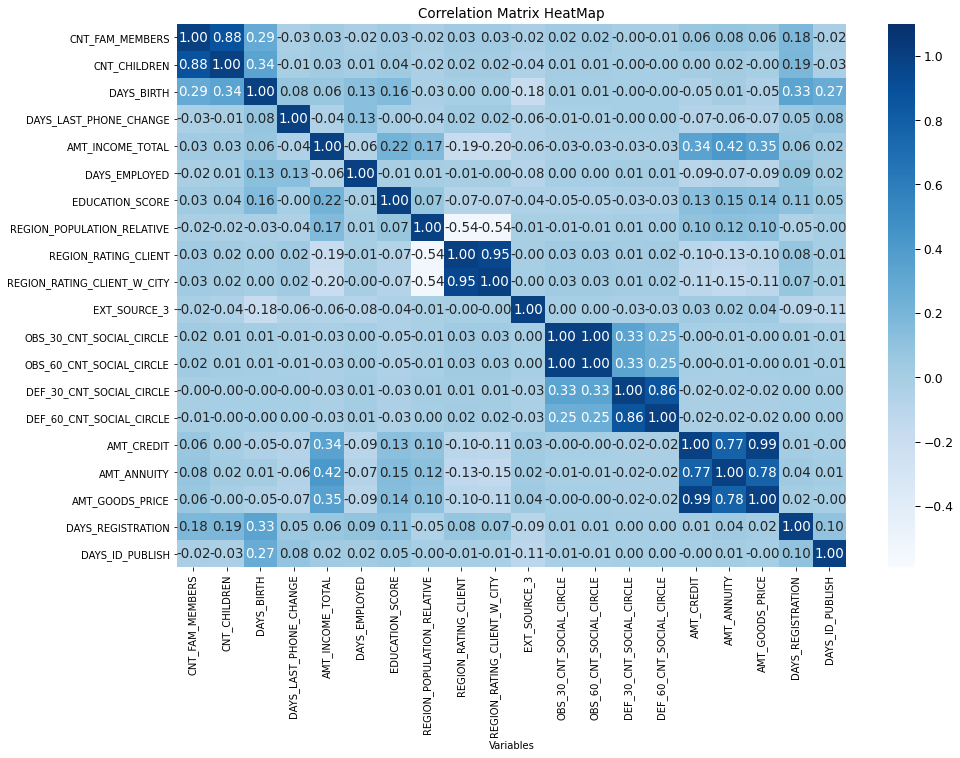

In [69]:
# Correlation in dataset for TARGET = 0 (No Default)
MakeHeatMap(ad_T_0, all_noncategory_cols)

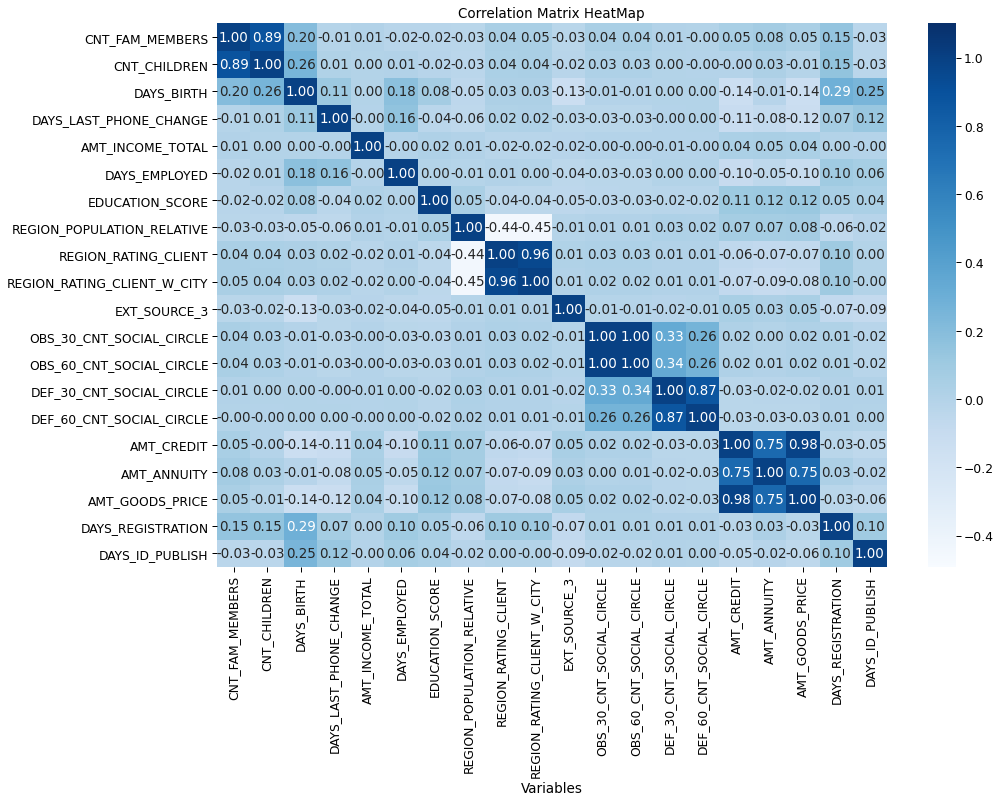

In [70]:
# Correlation in dataset for TARGET = 1 (Defaults)
MakeHeatMap(ad_T_1, all_noncategory_cols)

### Observations: 
In both data sets (for Target_0 and Target_1) We see a strong correlation between:
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE

This is to be expected, since AMT_CREDIT or ANNUITY extended to the client is based on the GOODS_PRICE.  However, we see one slight variation in that the Non-Defaulters INCOME_TOTAL has some (weak) correlation with these 3 variables. But the defaulters have no such correlation. This indicates that Non-Defaulters seem to seek Loans whose value correlate with their incomes; thereby strengthening the possibility of paying back the loans. The defaulters on the other hand seem to have gotten Loan amounts that do not correlate with their income (thus making the loans more risky)

### Distribution of the variables in Default-vs-NonDefault sets. 
The patterns between all other variables is the same for both datasets.  We should also look at the distribution of the variables in both sets. If a variable has impact on the TARGET, then its distribution in T0 and T1 sets would be different. 

In [71]:
Top10Correlations(ad_T_0)

                               V1                          V2  Correlation
1822     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998513
340               AMT_GOODS_PRICE                  AMT_CREDIT     0.987260
1139  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.949905
1010              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878681
1367  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861303
1879     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859458
1538      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830488
341               AMT_GOODS_PRICE                 AMT_ANNUITY     0.775838
284                   AMT_ANNUITY                  AMT_CREDIT     0.770379
736                FLAG_EMP_PHONE                  DAYS_BIRTH     0.622090


In [72]:
Top10Correlations(ad_T_1)

                               V1                          V2  Correlation
1822     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998286
340               AMT_GOODS_PRICE                  AMT_CREDIT     0.983065
1139  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956477
1010              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885556
1879     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.869761
1367  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847260
1538      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778110
341               AMT_GOODS_PRICE                 AMT_ANNUITY     0.752206
284                   AMT_ANNUITY                  AMT_CREDIT     0.751400
2197              FLAG_DOCUMENT_6              FLAG_EMP_PHONE     0.617071


### Observations: 
- The top 10 correlations for pairs of variables (non-categorical) in application data show the same trends. 

<Figure size 720x720 with 0 Axes>

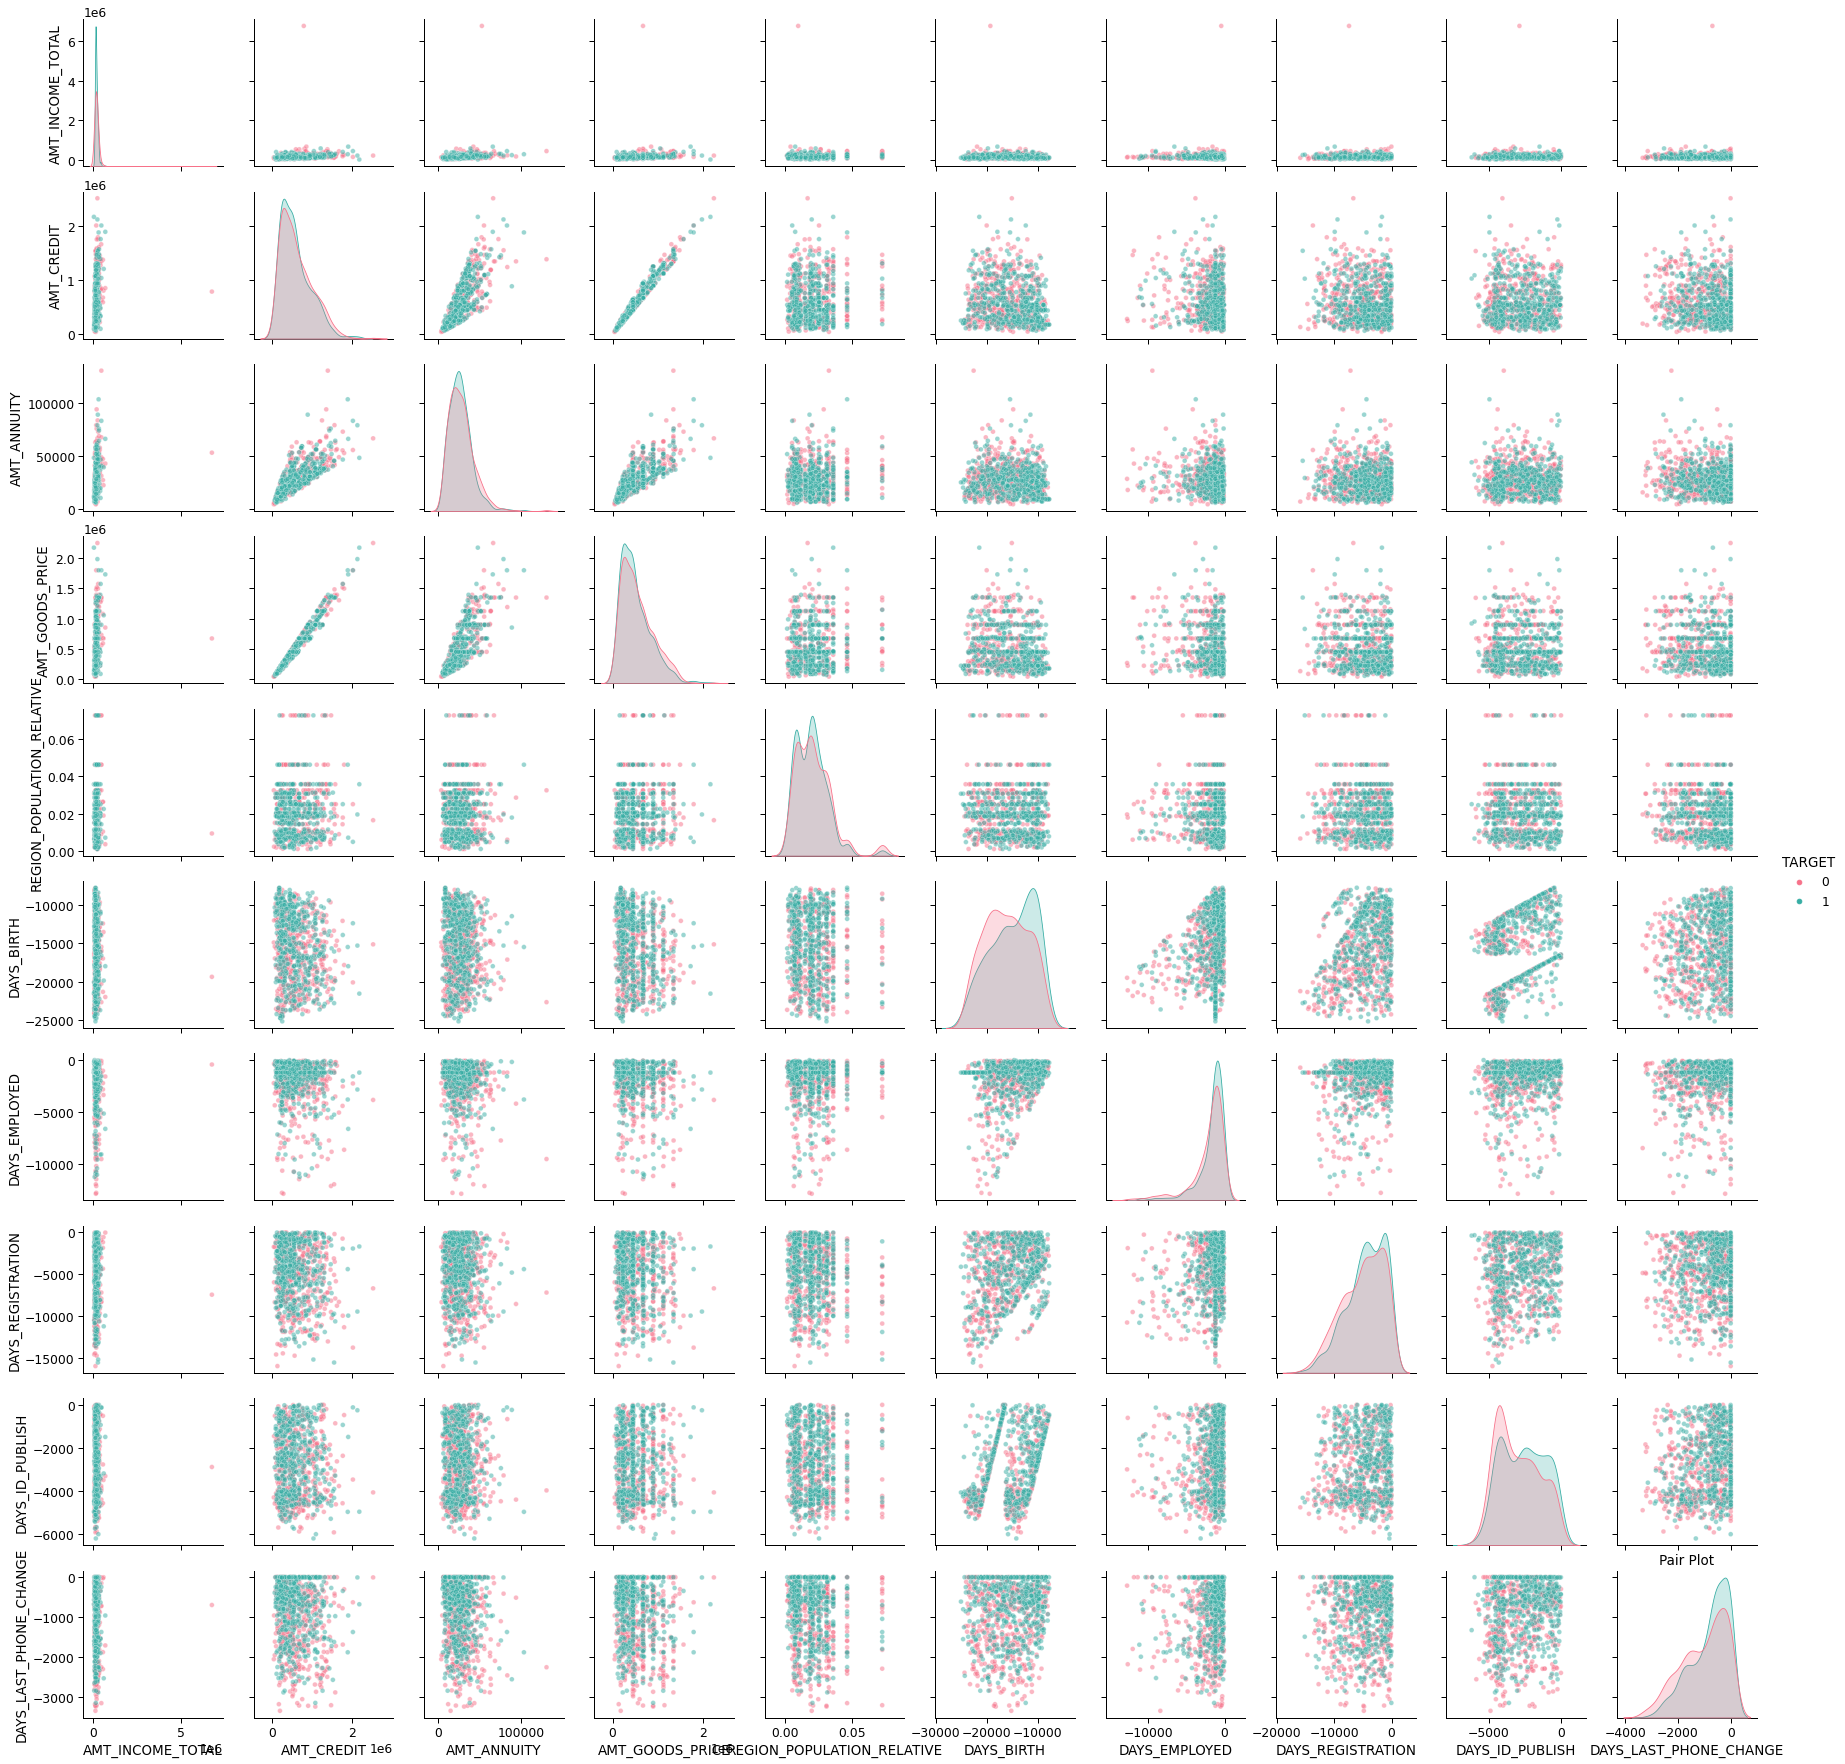

In [73]:
# We want to create PAIR-PLOTS of various numerical coumns in AD and view the distribution by TARGET variable. 
# For this, we will sample both ad_T_0 and ad_T_1 equally and create a combined dataframe. 

AD_NUM_COLS = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

# We will collect a random sample of 1000 rows (500 each from ad_T_0 and ad_T_1)
df1 = ad_T_0[AD_NUM_COLS].sample(n=500, replace=False)
df2 = ad_T_1[AD_NUM_COLS].sample(n=500, replace=False)
df = pd.concat([df1, df2], axis=0)

 # PAIR PLOT
plt.figure(figsize=(10,10))
sns.pairplot(df, hue='TARGET', palette='husl', plot_kws={"alpha":0.5})
plt.title("Pair Plot")
plt.show()

### Observations:
Looking at the KDE plots (on the diagonal), we see that the distribution of the variables for both TARGET 0 and TARGET 1 are nearly identical. Hence, none of these variables (ALONE) can be used to predict if client is likely to be a defaulter. We can also confirm this for pretty much any numerical variable above using boxplots that give a clearer picture.

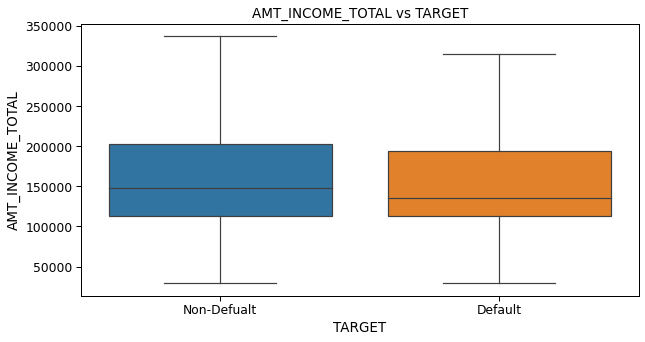

In [74]:
 
# Only one example of AMT_INCOME_TOTAL vs TARGET is shown below (2000 samples from each TARGET category). 
df = GetSample(AD_NUM_COLS)

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=df, x='TARGET', y='AMT_INCOME_TOTAL', showfliers = False)
ax.set_xticklabels(['Non-Defualt', 'Default'])
plt.title("AMT_INCOME_TOTAL vs TARGET")
plt.show()

# Plot below shows a near identical distribution of income for both defaulters and non-defaulters. 
# This same pattern is observed for all other numerical varaibles as well (but not plotted here in
# interest of it becoming too many graphs). 

## BiVariate Analysis: Categorical Variables

### In this section, we will test impact of various category variables against the TARGET variable.  Equal size samples are taken from both TARGET subsets.  If there is an impact of a categorical variable, then the bar plots should show a significantly unequal distribution for Target 0 and 1. 

In [75]:
# First, we create sets of related category variables of interest in Application data. 
# 'TARGET' variable has been added to each set of variables. 

personal_details = ['TARGET', 'CODE_GENDER','NAME_FAMILY_STATUS']
                    
career_and_income = ['TARGET', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']

contact_information = ['TARGET', 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

documents_submitted = ['TARGET', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

region_data = ['TARGET', 'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION',
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                'LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']

application_processing = ['TARGET', 'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
                    'HOUR_APPR_PROCESS_START']

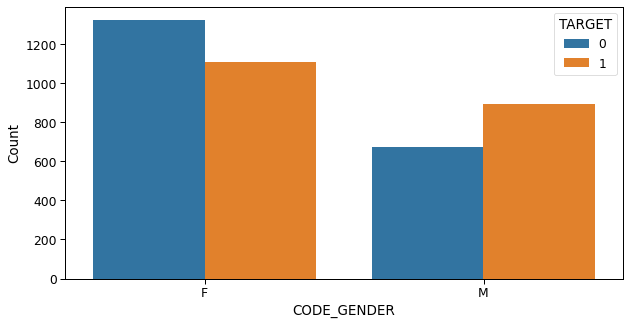

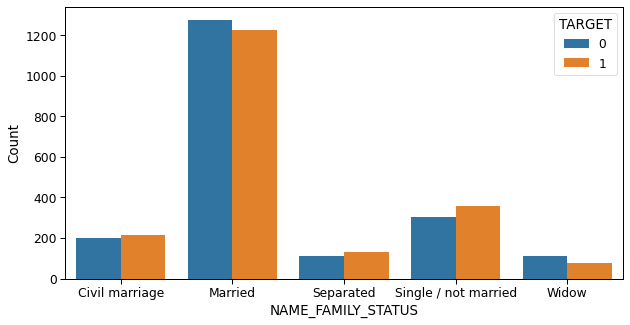

In [76]:
# Impact of personal details on TARGET. 

personal_details = ['TARGET', 'CODE_GENDER','NAME_FAMILY_STATUS']

# Sample data from the 2 targets (0 and 1)
df = GetSample(personal_details)

# Plot the category columns. 
MakeBarPlot_CategoryVars_vs_Target(df)

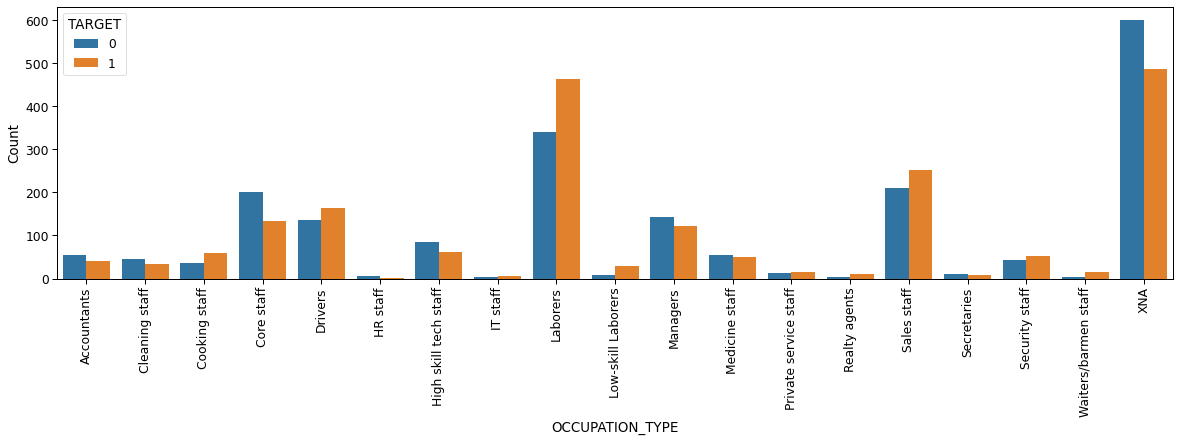

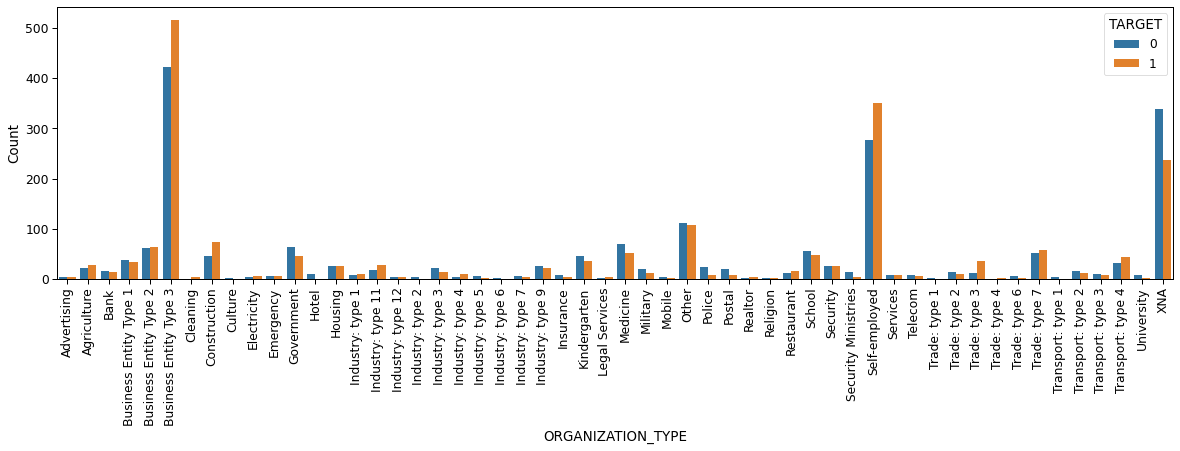

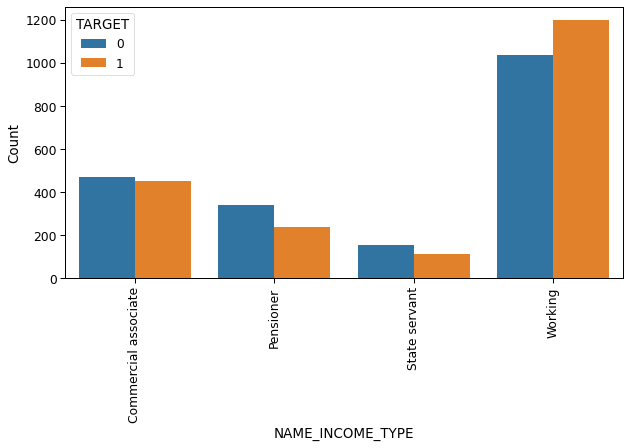

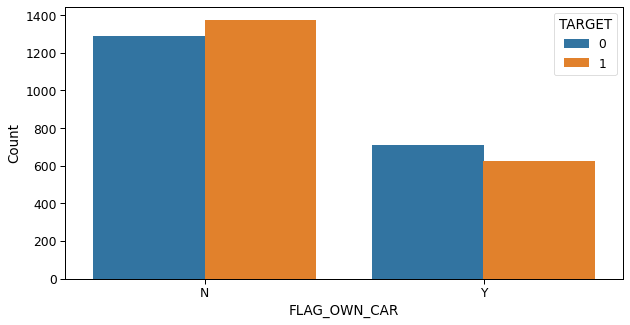

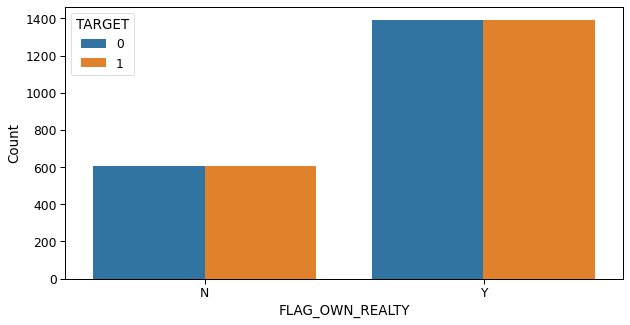

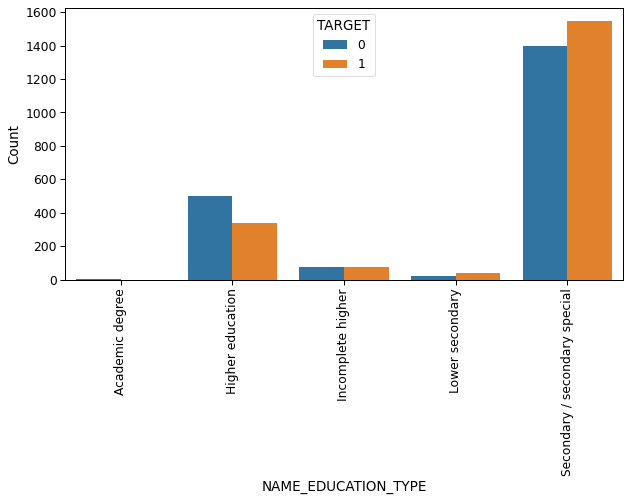

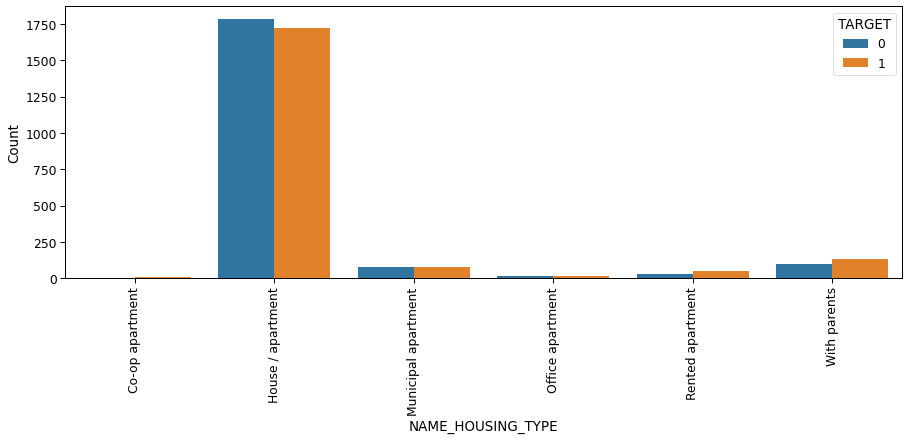

In [80]:
# Impact of fields related to clients career, income, assets etc. on TARGET. 
                    
career_and_income = ['TARGET', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']

# Sample data from the 2 targets (0 and 1)
df = GetSample(career_and_income)

# Plot the category columns. 
MakeBarPlot_CategoryVars_vs_Target(df)

UniqVals =  ['1']


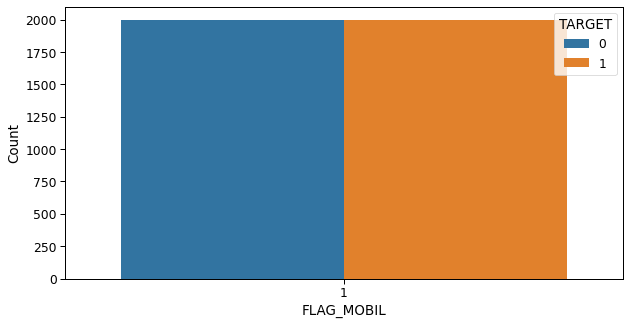



UniqVals =  ['1', '0']


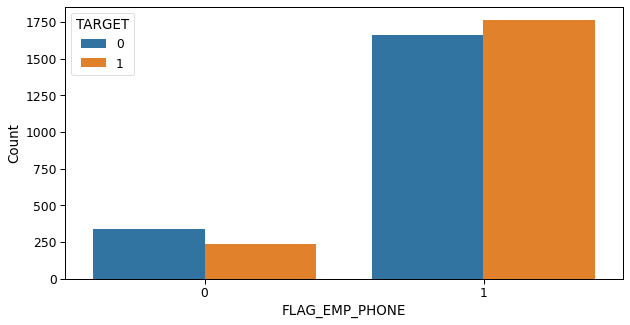



UniqVals =  ['0', '1']


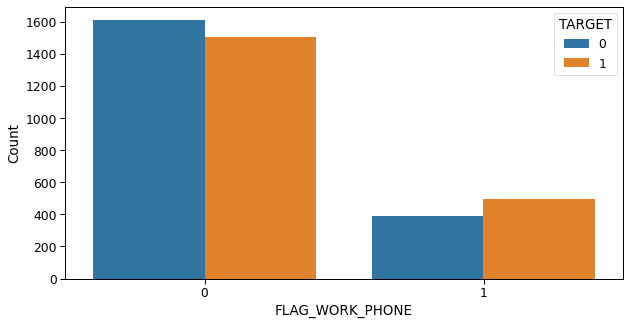



UniqVals =  ['1', '0']


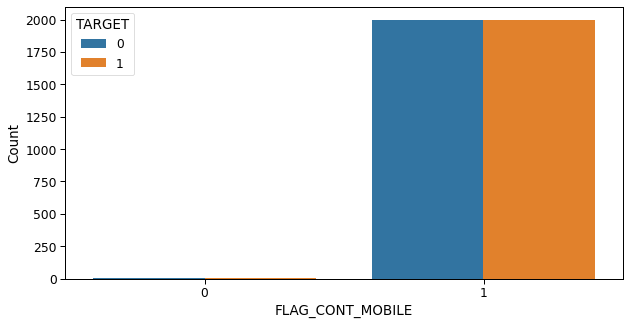



UniqVals =  ['0', '1']


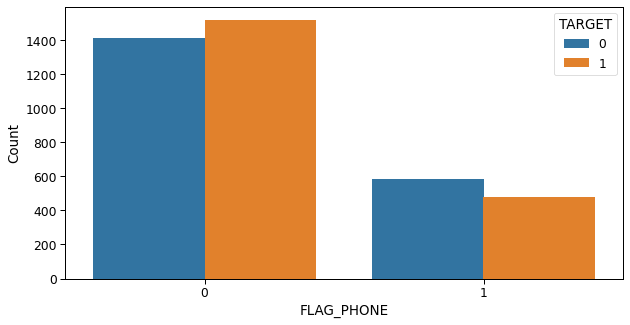



UniqVals =  ['0', '1']


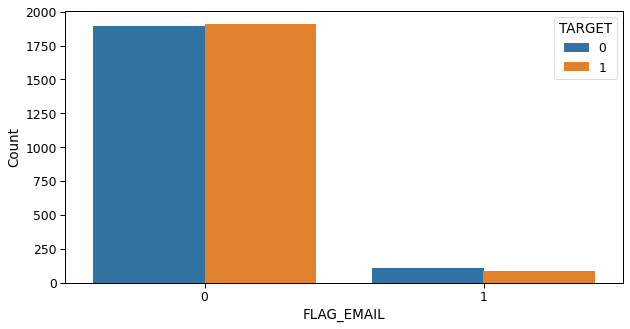

In [87]:
# Impact of fields for CONTACT INFORMATION on TARGET. 

contact_information = ['TARGET', 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

# Sample data from the 2 targets (0 and 1)
df = GetSample(contact_information)

# Plot the category columns. 
MakeBarPlot_CategoryVars_vs_Target(df)

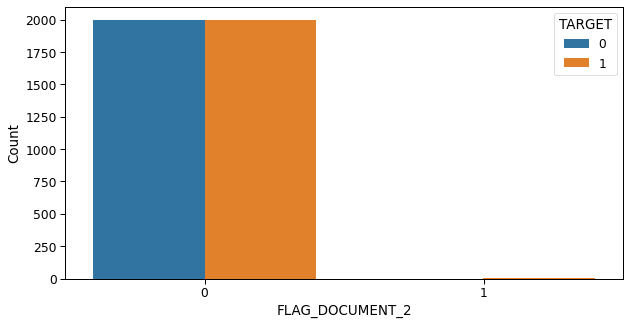

In [89]:
# Impact of fields related to Documentation Submitted on TARGET. 

# There are almost 20 FLAG_DOCUMENT_# fields.  Only one is included here as sample to prevent too many graphs. 
# However, it was seen that all 20 FLAG_DOCUMENT_# fields followed same pattern 
# (i.e., no distinction for T0 or T1 sets). 
documents_submitted = ['TARGET', 'FLAG_DOCUMENT_2']

# Sample data from the 2 targets (0 and 1)
df = GetSample(documents_submitted)

# Plot the category columns. 
MakeBarPlot_CategoryVars_vs_Target(df)

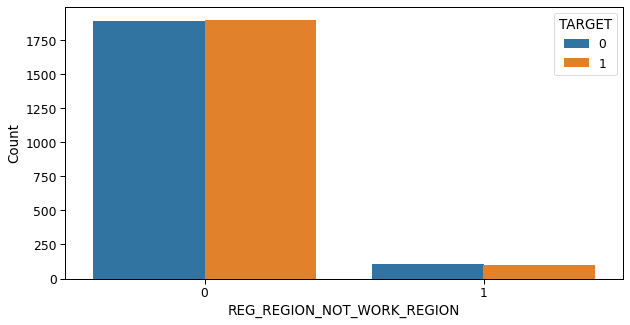

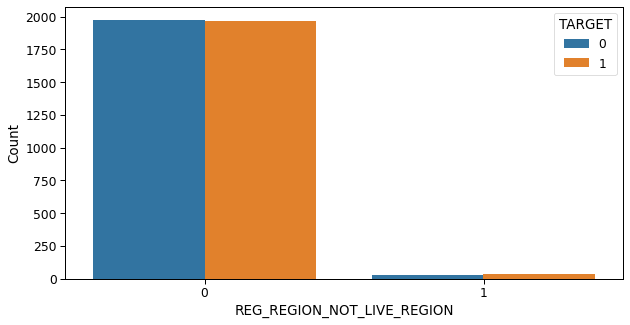

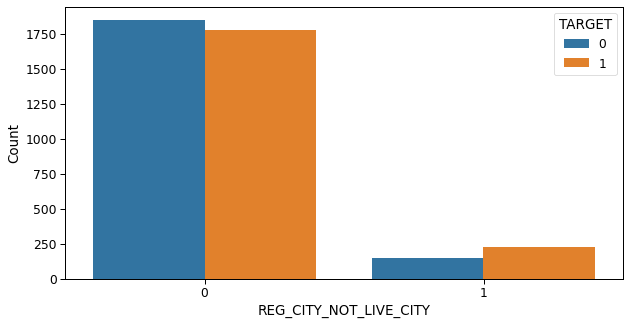

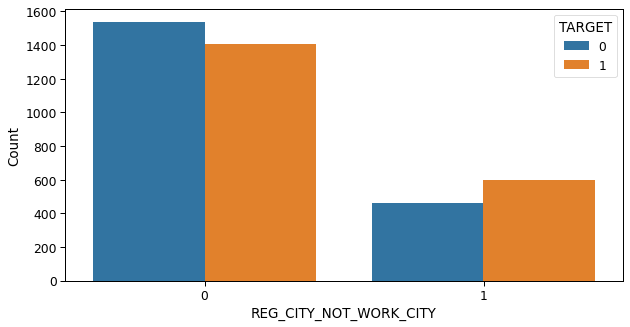

In [ ]:
# Impact of fields related to REGION information on TARGETS 0 or 1. 

region_data = ['TARGET', 'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION',
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                'LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']

# Sample data from the 2 targets (0 and 1)
df = GetSample(region_data)

# Plot the category columns. 
MakeBarPlot_CategoryVars_vs_Target(df)

In [ ]:
# Impact of fields related to conditions during application (such as who accompanied client, what time did client apply for ..etc) on TARGETS 0 or 1. 

application_processing = ['TARGET', 'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

# Sample data from the 2 targets (0 and 1)
df = GetSample(application_processing)

# Plot the category columns. 
MakeBarPlot_CategoryVars_vs_Target(df)